# Question 3

In [607]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [608]:
# read data and display top 5 tuples
df = pd.read_csv('data.csv')
df.head(5)

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error,Unnamed: 6
0,1,84,254,0,3,2,NaN
1,0,58,247,0,6,9,NaN
2,0,56,125,1,6,8,NaN
3,0,55,22,0,11,7,NaN
4,1,95,262,0,2,3,NaN


In [609]:
# check for missing values
df.isna().sum()

Purchase          0
SUS               0
Duration          0
Gender            0
ASR_Error         0
Intent_Error      0
Unnamed: 6      100
dtype: int64

In [610]:
# drop end column
df.drop('Unnamed: 6', axis=1, inplace=True)
df.isna().sum()

Purchase        0
SUS             0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

> Since there are no missing values, we do not have to replace them.

In [611]:
# import libraries for the model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [612]:
# prepare dependent and independent variables
dependent = df['Purchase'].to_numpy()
independent = df.drop(columns=['SUS','Purchase'], axis = 1).to_numpy()

# scale data
scale = StandardScaler()
scaled = scale.fit_transform(independent)

# call train_test_split to split into train & test
x_train, x_test, y_train, y_test = train_test_split(scaled, dependent, test_size = 0.3)

In [613]:
# import classifiers and metrics
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # SVM
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt # for plotting

In [614]:
# instantiate the models
lgr_model = LogisticRegression();
svm_model = SVC(probability=True)
nby_model = GaussianNB();
rfr_model = RandomForestClassifier();

In [615]:
# smote for imbalanced classifications (not really imbalanced but just in case)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
over_sampled_x_train, over_sampled_y_train = oversample.fit_resample(x_train, y_train)

In [616]:
# train the models using .fit() function
lgr_model.fit(over_sampled_x_train, over_sampled_y_train)
svm_model.fit(over_sampled_x_train, over_sampled_y_train)
nby_model.fit(over_sampled_x_train, over_sampled_y_train)
rfr_model.fit(over_sampled_x_train, over_sampled_y_train)

RandomForestClassifier()

In [617]:
# test models using the test data
y_lgr_pred = lgr_model.predict(x_test)
y_lgr_prob_pred = lgr_model.predict_proba(x_test)

y_svm_pred = svm_model.predict(x_test)
y_svm_prob_pred = svm_model.predict_proba(x_test)

y_nby_pred = nby_model.predict(x_test)
y_nby_prob_pred = nby_model.predict_proba(x_test)

y_rfr_pred = rfr_model.predict(x_test)
y_rfr_prob_pred = rfr_model.predict_proba(x_test)

In [618]:
# classification reports
print(classification_report(y_test, y_lgr_pred))
print(classification_report(y_test, y_svm_pred))
print(classification_report(y_test, y_nby_pred))
print(classification_report(y_test, y_rfr_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.89      0.94      0.91        17

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.90        30
weighted avg       0.90      0.90      0.90        30

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.94      0.94      0.94        17

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.93      0.76      0.84        17

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.83        30
weighted avg       0.85      0.83      0.83        30

              preci

In [619]:
# combine all the items so that we can iterate through them
model_names = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
predictions = [y_lgr_pred, y_svm_pred, y_nby_pred, y_rfr_pred]
predicted_probabilities = [y_lgr_prob_pred, y_svm_prob_pred, y_nby_prob_pred, y_rfr_prob_pred]

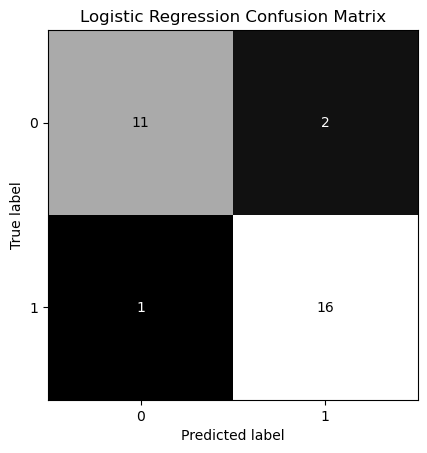

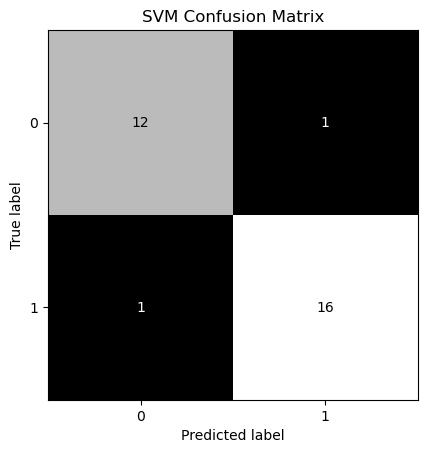

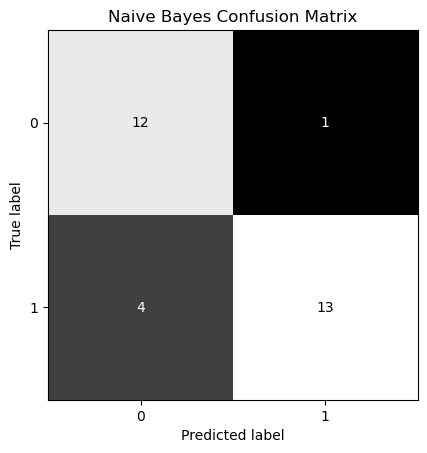

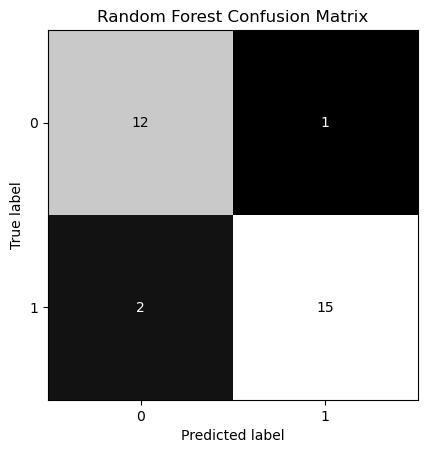

In [620]:
# display confusion matrix for each model type
for name, pred, prob_pred in zip(model_names, predictions, predicted_probabilities): 
    display = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), pred))
    display.plot(include_values=True, cmap='gray', colorbar=False)
    display.ax_.set_title(f"{name} Confusion Matrix")

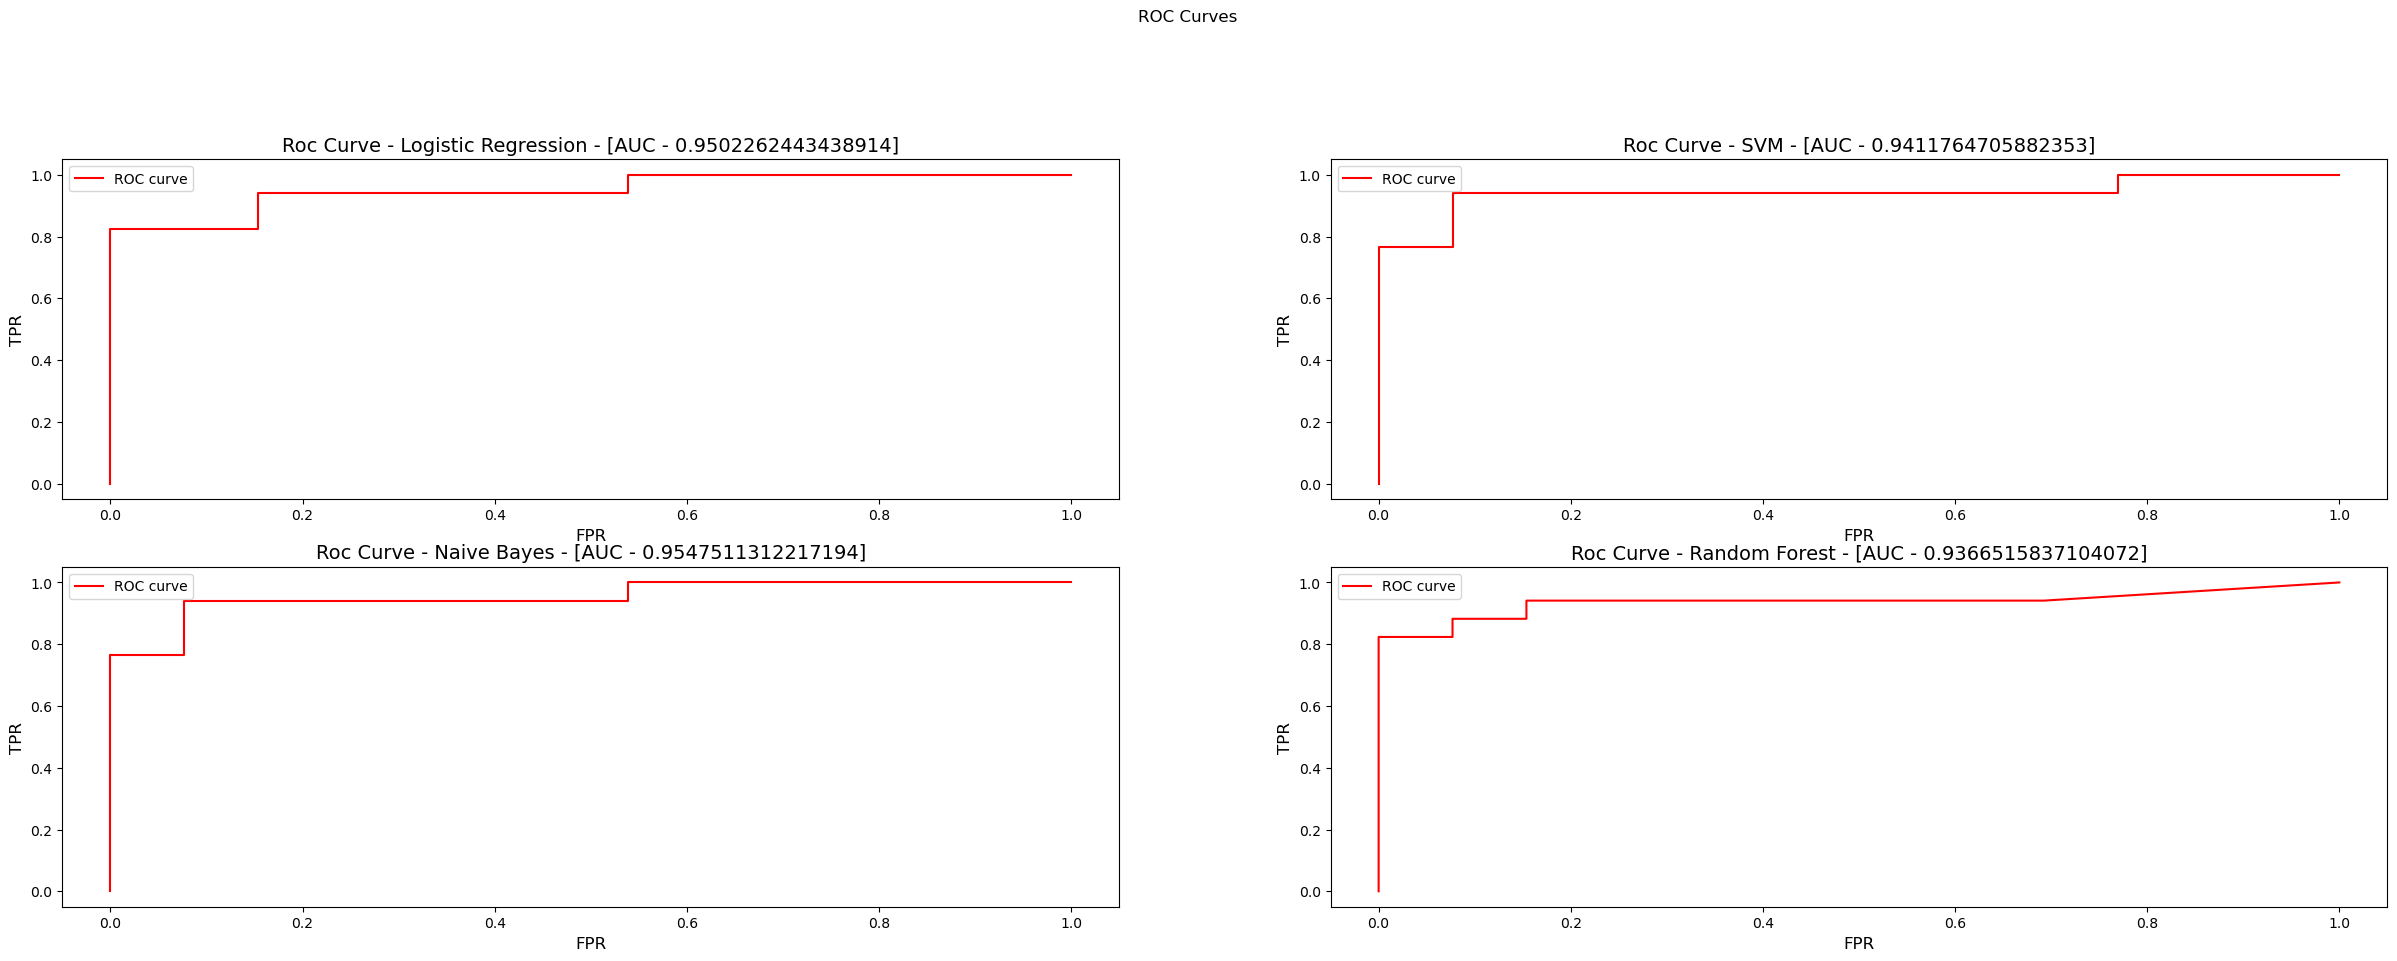

In [621]:
# prepare plot for ROC curves
plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1 # so we can have multiple curves

for name, prediction, prob_pred in zip(model_names, predictions, predicted_probabilities):
    # get false positive rate, true positive rate, and thresholds from roc_curve(...)
    fpr, tpr, thresholds = roc_curve(y_test, prob_pred[:, 1])
    # get AUCs to compare ROC curves later 
    auc_score = auc(fpr, tpr)

    # create subplots
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    plot_index += 1

    # titles and labels
    plt.title(f'Roc Curve - {name} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
plt.show()